Penguin classification problem
Imagine you are an ornithologist seeking an automated way to categorize each penguin you find. Machine learning provides many algorithms to classify penguins statistically. For instance, a sophisticated machine learning program could classify penguins based on photographs. The model you build in this tutorial is a little simpler. It classifies penguins based on their body weight, flipper length, and beaks, specifically the length and width measurements of their culmen.

In [ ]:
# pip install -q tfds-nightly

Note: you may need to restart the kernel to use updated packages.


In [1]:
import os
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

print("TensorFlow version: {}".format(tf.__version__))
print("TensorFlow Datasets version: ",tfds.__version__)

KeyboardInterrupt: 

In [3]:
class_names = ['Adélie', 'Chinstrap', 'Gentoo']

Download the preprocessed dataset
Now, download the preprocessed penguins dataset (penguins/processed) with the tfds.load method, which returns a list of tf.data.Dataset objects. Note that the penguins/processed dataset doesn't come with its own test set, so use an 80:20 split to slice the full dataset into the training and test sets. You will use the test dataset later to verify your model.


ds_spl

In [5]:
import os

In [ ]:
ds_split, info = tfds.load("penguins/processed", split=['train[:20%]', 'train[20%:]'], data_dir=os.getcwd(), as_supervised=True, with_info=True)

Dl Size...: 0 MiB [00:00, ? MiB/s]0/1 [00:00<?, ? url/s]
Dl Completed...: 100%|██████████| 1/1 [00:00<00:00,  3.21 url/s]


Dataset penguins downloaded and prepared to d:\a27_YEARS_OLD\deep_learning\layer_ custom\penguins\processed\1.0.0. Subsequent calls will reuse this data.


In [10]:
ds_split

[<_PrefetchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>,
 <_PrefetchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>]

In [11]:
info

tfds.core.DatasetInfo(
    name='penguins',
    full_name='penguins/processed/1.0.0',
    description="""
    Measurements for three penguin species observed in the Palmer Archipelago,
    Antarctica.
    
    These data were collected from 2007 - 2009 by Dr. Kristen Gorman with the
    [Palmer Station Long Term Ecological Research Program](https://pal.lternet.edu/),
    part of the [US Long Term Ecological Research Network](https://lternet.edu/).
    The data were originally imported from the
    [Environmental Data Initiative](https://environmentaldatainitiative.org/) (EDI)
    Data Portal, and are available for use by CC0 license ("No Rights Reserved") in
    accordance with the Palmer Station Data Policy. This copy was imported from
    [Allison Horst's GitHub repository](https://allisonhorst.github.io/palmerpenguins/articles/intro.html).
    """,
    config_description="""
    `penguins/processed` is a drop-in replacement for the `iris`
    dataset. It contains 4 normalised numeri

If the ds_test object is not an instance of tf.data.Dataset, the assertion will raise an AssertionError with a message indicating that the object is not a valid dataset.

In [ ]:
ds_test = ds_split[0]
ds_train = ds_split[1]
# This line of code checks if the ds_test object is an instance of tf.data.Dataset.
# Assert that ds_test is a valid dataset object
assert isinstance(ds_test, tf.data.Dataset)

In [ ]:
print(info.features)

FeaturesDict({
    'features': Tensor(shape=(4,), dtype=float32),
    'species': ClassLabel(shape=(), dtype=int64, num_classes=3),
})


In [ ]:
ds_test

<_PrefetchDataset element_spec=(TensorSpec(shape=(4,), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [13]:
df_test = tfds.as_dataframe(ds_test.take(5), info)
print("Test dataset sample: ")
print(df_test)

Test dataset sample: 
                                         features  species
0  [0.6545454, 0.22619048, 0.89830506, 0.6388889]        2
1        [0.36, 0.04761905, 0.6440678, 0.4027778]        2
2       [0.68, 0.30952382, 0.91525424, 0.6944444]        2
3   [0.6181818, 0.20238096, 0.8135593, 0.6805556]        2
4  [0.5527273, 0.26190478, 0.84745765, 0.7083333]        2


In [14]:
df_train = tfds.as_dataframe(ds_train.take(5), info)
print("Train dataset sample: ")
print(df_train)

Train dataset sample: 
                                         features  species
0  [0.49818182, 0.6904762, 0.42372882, 0.4027778]        0
1      [0.48, 0.071428575, 0.6440678, 0.44444445]        2
2    [0.7236364, 0.9047619, 0.6440678, 0.5833333]        1
3  [0.34545454, 0.5833333, 0.33898306, 0.3472222]        0
4       [0.10909091, 0.75, 0.3559322, 0.41666666]        0


In [15]:
ds_train_batch = ds_train.batch(32)

In [16]:
ds_train_batch

<_BatchDataset element_spec=(TensorSpec(shape=(None, 4), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [17]:
features, labels = next(iter(ds_train_batch))

print(features)
print(labels)

tf.Tensor(
[[0.49818182 0.6904762  0.42372882 0.4027778 ]
 [0.48       0.07142857 0.6440678  0.44444445]
 [0.7236364  0.9047619  0.6440678  0.5833333 ]
 [0.34545454 0.5833333  0.33898306 0.3472222 ]
 [0.10909091 0.75       0.3559322  0.41666666]
 [0.6690909  0.63095236 0.47457626 0.19444445]
 [0.8036364  0.9166667  0.4915254  0.44444445]
 [0.4909091  0.75       0.37288135 0.22916667]
 [0.33454546 0.85714287 0.37288135 0.2361111 ]
 [0.32       0.41666666 0.2542373  0.1388889 ]
 [0.41454545 0.5952381  0.5084746  0.19444445]
 [0.14909092 0.48809522 0.2542373  0.125     ]
 [0.23636363 0.4642857  0.27118644 0.05555556]
 [0.22181818 0.5952381  0.22033899 0.3472222 ]
 [0.24727273 0.5595238  0.15254237 0.25694445]
 [0.63272727 0.35714287 0.88135594 0.8194444 ]
 [0.47272727 0.15476191 0.6440678  0.4722222 ]
 [0.6036364  0.23809524 0.84745765 0.7361111 ]
 [0.26909092 0.5595238  0.27118644 0.16666667]
 [0.28       0.71428573 0.20338982 0.5416667 ]
 [0.10545454 0.5714286  0.33898306 0.2847222 ]
 [

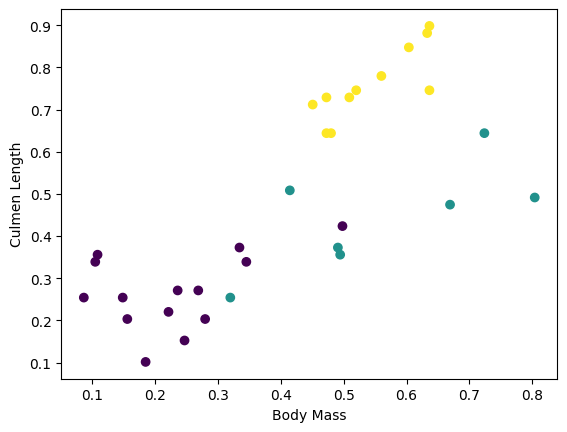

In [18]:
plt.scatter(features[:,0],
            features[:,2],
            c=labels,
            cmap='viridis')

plt.xlabel("Body Mass")
plt.ylabel("Culmen Length")
plt.show()

Why model?
A model is a relationship between features and the label. For the penguin classification problem, the model defines the relationship between the body mass, flipper and culmen measurements and the predicted penguin species. Some simple models can be described with a few lines of algebra, but complex machine learning models have a large number of parameters that are difficult to summarize.

Could you determine the relationship between the four features and the penguin species without using machine learning? That is, could you use traditional programming techniques (for example, a lot of conditional statements) to create a model? Perhaps—if you analyzed the dataset long enough to determine the relationships between body mass and culmen measurements to a particular species. And this becomes difficult—maybe impossible—on more complicated datasets. A good machine learning approach determines the model for you. If you feed enough representative examples into the right machine learning model type, the program figures out the relationships for you.

Select the model
Next you need to select the kind of model to train. There are many types of models and picking a good one takes experience. This tutorial uses a neural network to solve the penguin classification problem. Neural networks can find complex relationships between features and the label. It is a highly-structured graph, organized into one or more hidden layers. Each hidden layer consists of one or more neurons. There are several categories of neural networks and this program uses a dense, or fully-connected neural network: the neurons in one layer receive input connections from every neuron in the previous layer. For example, Figure 2 illustrates a dense neural network consisting of an input layer, two hidden layers, and an output layer:

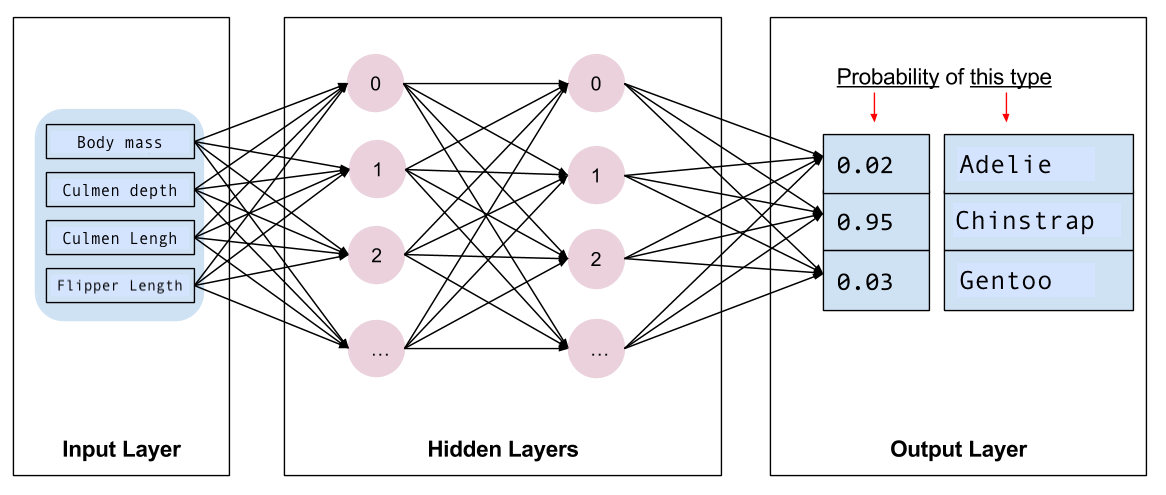

When you train the model from Figure 2 and feed it an unlabeled example, it yields three predictions: the likelihood that this penguin is the given penguin species. This prediction is called inference. For this example, the sum of the output predictions is 1.0. In Figure 2, this prediction breaks down as: 0.02 for Adelie, 0.95 for Chinstrap, and 0.03 for Gentoo species. This means that the model predicts—with 95% probability—that an unlabeled example penguin is a Chinstrap penguin.

The tf.keras.Sequential model is a linear stack of layers. Its constructor takes a list of layer instances, in this case, two tf.keras.layers.Dense layers with 10 nodes each, and an output layer with 3 nodes representing your label predictions. The first layer's input_shape parameter corresponds to the number of features from the dataset, and is required:

In [ ]:
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.nn.relu, input_shape=(4,)),  # input shape required or no of features columns no 
  tf.keras.layers.Dense(10, activation=tf.nn.relu),
  tf.keras.layers.Dense(3) # output layer 3 neuron node logits output without activation softmax
])

In [ ]:
# input_shape = (row, column, chanel) # for color image chanel = 3 (rgb), for gray image chanel = 1

The activation function determines the output shape of each node in the layer. These non-linearities are important—without them the model would be equivalent to a single layer. There are many tf.keras.activations, but ReLU is common for hidden layers.

In [21]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 193 (772.00 B)

 Trainable params: 193 (772.00 B)

 Non-trainable params: 0 (0.00 B)

The ideal number of hidden layers and neurons depends on the problem and the dataset. Like many aspects of machine learning, picking the best shape of the neural network requires a mixture of knowledge and experimentation. As a rule of thumb, increasing the number of hidden layers and neurons typically creates a more powerful model, which requires more data to train effectively.

Use the model
Let's have a quick look at what this model does to a batch of features:

In [ ]:
predictions = model(features) # logits output one batch of features, 32 dataset per batch
predictions[:5]

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[ 0.41181526, -0.03019807,  0.11927288],
       [ 0.28401572, -0.06237116,  0.04960279],
       [ 0.579682  , -0.06029058,  0.16976169],
       [ 0.32631728, -0.01090856,  0.09182434],
       [ 0.32433012,  0.03233405,  0.08057968]], dtype=float32)>

Here, each example returns a logit for each class.

To convert these logits to a probability for each class, use the softmax function:

In [23]:
tf.nn.softmax(predictions[:5])

<tf.Tensor: shape=(5, 3), dtype=float32, numpy=
array([[0.41856682, 0.2690301 , 0.31240308],
       [0.40027636, 0.28309098, 0.31663266],
       [0.45641053, 0.2406684 , 0.30292112],
       [0.39924634, 0.28496113, 0.3157926 ],
       [0.39518592, 0.2951136 , 0.30970055]], dtype=float32)>

Taking the tf.math.argmax across classes gives us the predicted class index. But, the model hasn't been trained yet, so these aren't good predictions:

In [24]:
print("Prediction: {}".format(tf.math.argmax(predictions, axis=1)))
print("    Labels: {}".format(labels))

Prediction: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
    Labels: [0 2 1 0 0 1 1 1 0 1 1 0 0 0 0 2 2 2 0 0 0 0 2 2 1 2 0 2 2 2 2 0]


Train the model
Training is the stage of machine learning when the model is gradually optimized, or the model learns the dataset. The goal is to learn enough about the structure of the training dataset to make predictions about unseen data. If you learn too much about the training dataset, then the predictions only work for the data it has seen and will not be generalizable. This problem is called overfitting—it's like memorizing the answers instead of understanding how to solve a problem.

The penguin classification problem is an example of supervised machine learning: the model is trained from examples that contain labels. In unsupervised machine learning, the examples don't contain labels. Instead, the model typically finds patterns among the features.

Define the loss and gradients function
Both training and evaluation stages need to calculate the model's loss. This measures how off a model's predictions are from the desired label, in other words, how bad the model is performing. You want to minimize, or optimize, this value.

Your model will calculate its loss using the tf.keras.losses.SparseCategoricalCrossentropy function which takes the model's class probability predictions and the desired label, and returns the average loss across the examples.

In [25]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

Or we can compile model with loss_object and optimizer to calculate gradient and back propagation


calculate loss from logits

In [26]:
def loss(model, x, y, training):
  # training=training is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  y_ = model(x, training=training)

  return loss_object(y_true=y, y_pred=y_)

l = loss(model, features, labels, training=False)
print("Loss test: {}".format(l))

Loss test: 1.1038156747817993


Use the tf.GradientTape context to calculate the gradients used to optimize your model:

tf.GradientTape(): Creates a context for recording gradients.
loss_value = loss(model, inputs, targets, training=True): Computes the loss value.
tape.gradient(loss_value, model.trainable_variables): Computes gradients of loss with respect to model's trainable variables.

calculate gradients using GradientTape()

In [27]:
def grad(model, inputs, targets):
  with tf.GradientTape() as tape:
    loss_value = loss(model, inputs, targets, training=True)
  return loss_value, tape.gradient(loss_value, model.trainable_variables)

Create an optimizer
An optimizer applies the computed gradients to the model's parameters to minimize the loss function. You can think of the loss function as a curved surface (refer to Figure 3) and you want to find its lowest point by walking around. The gradients point in the direction of steepest ascent—so you'll travel the opposite way and move down the hill. By iteratively calculating the loss and gradient for each batch, you'll adjust the model during training. Gradually, the model will find the best combination of weights and bias to minimize the loss. And the lower the loss, the better the model's predictions.

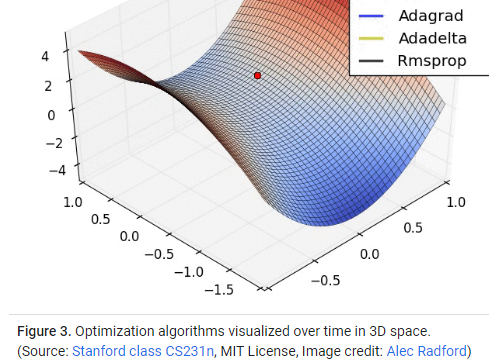

TensorFlow has many optimization algorithms available for training. In this tutorial, you will use the tf.keras.optimizers.SGD that implements the stochastic gradient descent (SGD) algorithm. The learning_rate parameter sets the step size to take for each iteration down the hill. This rate is a hyperparameter that you'll commonly adjust to achieve better results.

Instantiate the optimizer with a learning rate of 0.01, a scalar value that is multiplied by the gradient at each iteration of the training:

In [28]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)

In [29]:
loss_value, grads = grad(model, features, labels)

In [30]:
loss_value

<tf.Tensor: shape=(), dtype=float32, numpy=1.1038156747817993>

In [31]:
grads

[<tf.Tensor: shape=(4, 10), dtype=float32, numpy=
 array([[-0.03501076,  0.        ,  0.        ,  0.01128039,  0.        ,
          0.        ,  0.01467455,  0.09134685,  0.02140455,  0.        ],
        [-0.02632289,  0.        ,  0.        , -0.02257514,  0.        ,
          0.        ,  0.03499507,  0.03726395, -0.01294302,  0.        ],
        [-0.03382756,  0.        ,  0.        ,  0.03716525,  0.        ,
          0.        , -0.01070825,  0.12779254,  0.01027889,  0.        ],
        [-0.02515633,  0.        ,  0.        ,  0.03579542,  0.        ,
          0.        , -0.01515884,  0.10638747, -0.00049561,  0.        ]],
       dtype=float32)>,
 <tf.Tensor: shape=(10,), dtype=float32, numpy=
 array([-0.05816606,  0.        ,  0.        ,  0.02401839,  0.        ,
         0.        ,  0.00707787,  0.1683341 , -0.02571003,  0.        ],
       dtype=float32)>,
 <tf.Tensor: shape=(10, 10), dtype=float32, numpy=
 array([[-1.37649244e-03,  0.00000000e+00, -6.21017010e-04,

In [ ]:
print("Step: {}, Initial Loss: {}".format(optimizer.iterations.numpy(),
                                        loss_value.numpy()))

Step: 0, Initial Loss: 1.1038156747817993


zip(grads, model.trainable_variables): Pairs gradients with corresponding variables.
optimizer.apply_gradients(...): Updates variables based on gradients.

In [33]:
optimizer.apply_gradients(zip(grads, model.trainable_variables))

<KerasVariable shape=(), dtype=int64, path=SGD/iteration>

In [34]:
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 1,         Loss: 1.1026830673217773


In [36]:
optimizer.apply_gradients(zip(grads, model.trainable_variables))

<KerasVariable shape=(), dtype=int64, path=SGD/iteration>

In [37]:
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 2,         Loss: 1.1015524864196777


In [38]:
optimizer.apply_gradients(zip(grads, model.trainable_variables))

<KerasVariable shape=(), dtype=int64, path=SGD/iteration>

In [39]:
print("Step: {},         Loss: {}".format(optimizer.iterations.numpy(),
                                          loss(model, features, labels, training=True).numpy()))

Step: 3,         Loss: 1.1004283428192139


Training loop
With all the pieces in place, the model is ready for training! A training loop feeds the dataset examples into the model to help it make better predictions. The following code block sets up these training steps:

Iterate each epoch. An epoch is one pass through the dataset.
Within an epoch, iterate over each example in the training Dataset grabbing its features (x) and label (y).
Using the example's features, make a prediction and compare it with the label. Measure the inaccuracy of the prediction and use that to calculate the model's loss and gradients.
Use an optimizer to update the model's parameters.
Keep track of some stats for visualization.
Repeat for each epoch.
The num_epochs variable is the number of times to loop over the dataset collection. In the code below, num_epochs is set to 201 which means this training loop will run 201 times. Counter-intuitively, training a model longer does not guarantee a better model. num_epochs is a hyperparameter that you can tune. Choosing the right number usually requires both experience and experimentation:

In [42]:
## Note: Rerunning this cell uses the same model parameters

# Keep results for plotting
train_loss_results = []
train_accuracy_results = []

num_epochs = 50

for epoch in range(num_epochs):
  epoch_loss_avg = tf.keras.metrics.Mean()
  epoch_accuracy = tf.keras.metrics.SparseCategoricalAccuracy()

  # Training loop - using batches of 32
  for x, y in ds_train_batch:
    # Optimize the model
    loss_value, grads = grad(model, x, y)
    optimizer.apply_gradients(zip(grads, model.trainable_variables))

    # Track progress
    epoch_loss_avg.update_state(loss_value)  # Add current batch loss
    # Compare predicted label to actual label
    # training=True is needed only if there are layers with different
    # behavior during training versus inference (e.g. Dropout).
    epoch_accuracy.update_state(y, model(x, training=True))

  # End epoch
  train_loss_results.append(epoch_loss_avg.result())
  train_accuracy_results.append(epoch_accuracy.result())

  if epoch % 5 == 0:
    print("Epoch {:03d}: Loss: {:.3f}, Accuracy: {:.3%}".format(epoch,
                                                                epoch_loss_avg.result(),
                                                                epoch_accuracy.result()))

Epoch 000: Loss: 1.011, Accuracy: 47.566%
Epoch 005: Loss: 0.998, Accuracy: 57.303%
Epoch 010: Loss: 0.983, Accuracy: 70.412%
Epoch 015: Loss: 0.966, Accuracy: 77.903%
Epoch 020: Loss: 0.947, Accuracy: 80.150%
Epoch 025: Loss: 0.924, Accuracy: 80.150%
Epoch 030: Loss: 0.897, Accuracy: 80.150%
Epoch 035: Loss: 0.866, Accuracy: 80.524%
Epoch 040: Loss: 0.830, Accuracy: 80.524%
Epoch 045: Loss: 0.791, Accuracy: 80.524%


Alternatively, you could use the built-in Keras Model.fit(ds_train_batch) method to train your model.


Visualize the loss function over time
While it's helpful to print out the model's training progress, you can visualize the progress with TensorBoard - a visualization and metrics tool that is packaged with TensorFlow. For this simple example, you will create basic charts using the matplotlib module.

Interpreting these charts takes some experience, but in general you want to see the loss decrease and the accuracy increase:

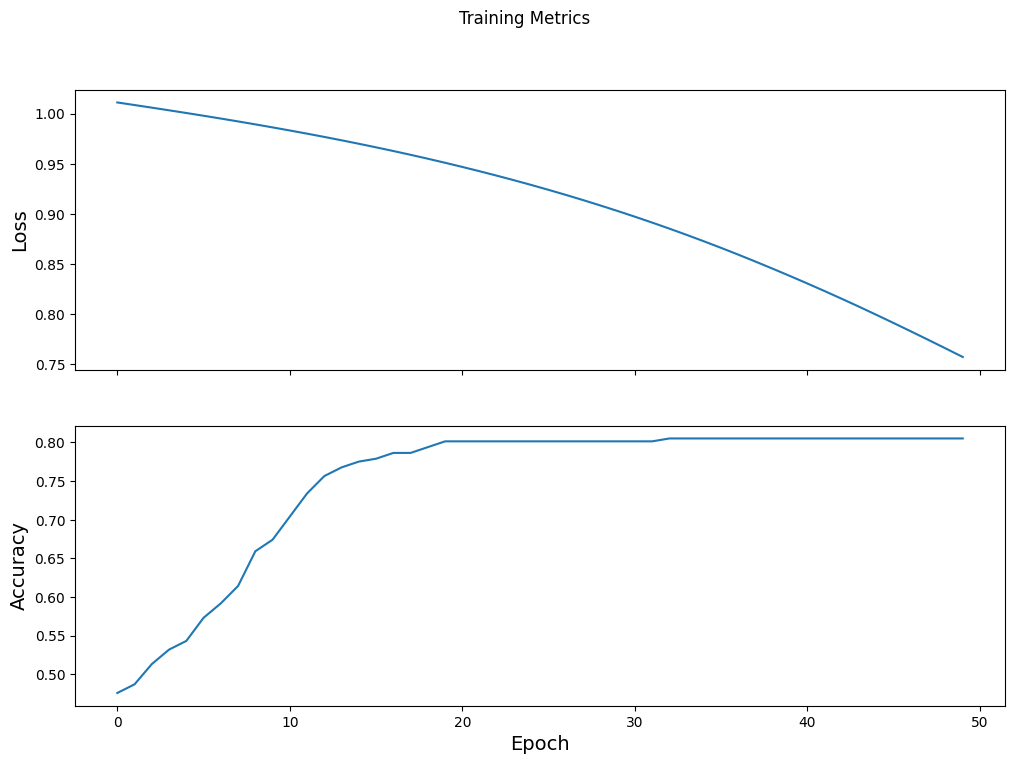

In [43]:
fig, axes = plt.subplots(2, sharex=True, figsize=(12, 8))
fig.suptitle('Training Metrics')

axes[0].set_ylabel("Loss", fontsize=14)
axes[0].plot(train_loss_results)

axes[1].set_ylabel("Accuracy", fontsize=14)
axes[1].set_xlabel("Epoch", fontsize=14)
axes[1].plot(train_accuracy_results)
plt.show()

Evaluate the model's effectiveness
Now that the model is trained, you can get some statistics on its performance.

Evaluating means determining how effectively the model makes predictions. To determine the model's effectiveness at penguin classification, pass some measurements to the model and ask the model to predict what penguin species they represent. Then compare the model's predictions against the actual label. For example, a model that picked the correct species on half the input examples has an accuracy of 0.5. Figure 4 shows a slightly more effective model, getting 4 out of 5 predictions correct at 80% accuracy:

Set up the test set
Evaluating the model is similar to training the model. The biggest difference is the examples come from a separate test set rather than the training set. To fairly assess a model's effectiveness, the examples used to evaluate a model must be different from the examples used to train the model.

The penguin dataset doesn't have a separate test dataset so in the previous Download the dataset section, you split the original dataset into test and train datasets. Use the ds_test_batch dataset for the evaluation.

Evaluate the model on the test dataset
Unlike the training stage, the model only evaluates a single epoch of the test data. The following code iterates over each example in the test set and compare the model's prediction against the actual label. This comparison is used to measure the model's accuracy across the entire test set

You can also use the model.evaluate(ds_test, return_dict=True) keras function to get accuracy information on your test dataset.

By inspecting the last batch, for example, you can observe that the model predictions are usually correct.

In [44]:
test_accuracy = tf.keras.metrics.Accuracy()
ds_test_batch = ds_test.batch(10)

for (x, y) in ds_test_batch:
  # training=False is needed only if there are layers with different
  # behavior during training versus inference (e.g. Dropout).
  logits = model(x, training=False)
  prediction = tf.math.argmax(logits, axis=1, output_type=tf.int64)
  test_accuracy(prediction, y)

print("Test set accuracy: {:.3%}".format(test_accuracy.result()))

Test set accuracy: 76.119%


You can also use the model.evaluate(ds_test, return_dict=True) keras function to get accuracy information on your test dataset.

By inspecting the last batch, for example, you can observe that the model predictions are usually correct.


In [ ]:
tf.stack([y,prediction],axis=1) # horizontal stack

<tf.Tensor: shape=(7, 2), dtype=int64, numpy=
array([[1, 0],
       [0, 0],
       [2, 2],
       [0, 0],
       [1, 0],
       [2, 2],
       [0, 0]])>

In [46]:
predict_dataset = tf.convert_to_tensor([ # for 3 set or feature
    [0.3, 0.8, 0.4, 0.5,],
    [0.4, 0.1, 0.8, 0.5,],
    [0.7, 0.9, 0.8, 0.4]
])

# training=False is needed only if there are layers with different
# behavior during training versus inference (e.g. Dropout).
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.math.argmax(logits).numpy() # output
  p = tf.nn.softmax(logits)[class_idx] # probability of output  
  name = class_names[class_idx] # name ot the output class
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: Adélie (54.9%)
Example 1 prediction: Gentoo (55.9%)
Example 2 prediction: Adélie (44.0%)
